In [1]:
import os
import re
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
historic_data = pd.read_csv('KenPomHistoric_2002_2017.csv')
teams_data = pd.read_csv('kenpom_teams.csv')
current_season_data = pd.read_csv('kenpomnew_active.csv')
historic_game_data = pd.read_csv('historic_game_results.csv')
historic_data.head()

,Rank,Team,Conf,W-L,AdjEM,AdjO,AdjD,AdjT,Luck,AdjEM_SOS,OppO,OppD,AdjEM_NCSOS,Year
0,1,Duke,ACC,31-4,34.19,121.0,86.8,74.5,-0.027,9.87,109.3,99.5,6.66,2002
1,2,Cincinnati,CUSA,31-4,30.19,118.1,87.9,67.4,0.002,6.58,106.5,100.0,3.48,2002
2,3,Maryland,ACC,32-4,29.25,119.2,89.9,73.7,0.025,9.88,109.4,99.5,1.62,2002
3,4,Kansas,B12,33-4,28.99,118.7,89.7,77.3,0.022,10.67,110.5,99.9,8.32,2002
4,5,Oklahoma,B12,31-5,26.04,114.9,88.9,66.5,0.043,8.77,109.2,100.4,-0.44,2002


In [3]:
current_season_data.head()

,Rk,Team,Conf,W-L,AdjEM,AdjO,AdjD,AdjT,Luck,AdjEM_SOS,OppO,OppD,AdjEM_NCSOS,Year
0,1,Villanova,BE,36-4,33.76,127.8,94.0,68.7,-0.018,11.31,111.3,100.0,3.98,2018
1,2,Virginia,ACC,31-3,29.53,115.2,85.6,59.4,0.048,9.24,110.0,100.7,-0.08,2018
2,3,Duke,ACC,29-8,28.86,122.4,93.6,69.7,-0.034,10.60,110.4,99.8,4.09,2018
3,4,Cincinnati,Amer,31-5,26.60,113.4,86.8,64.5,-0.019,3.46,106.9,103.4,-4.21,2018
4,5,Purdue,B10,30-7,26.27,122.7,96.4,67.2,0.006,9.02,109.1,100.1,0.69,2018


In [4]:
historic_data = historic_data[historic_data['Year'] >= 2011]
historic_data = pd.merge(historic_data, teams_data, left_on='Team', right_on='kenpom_unique')

current_season_data = pd.merge(current_season_data, teams_data, left_on='Team', right_on='kenpom_unique')

historic_data.drop(['Team', 'kenpom_unique', 'Conf', 'W-L', 'Rank'], axis=1, inplace=True)
current_season_data.drop(['Team','kenpom_unique', 'Conf', 'W-L', 'Rk'], axis=1, inplace=True)

full_data = pd.concat([historic_data, current_season_data])
full_data.columns

Index(['AdjEM', 'AdjO', 'AdjD', 'AdjT', 'Luck', 'AdjEM_SOS', 'OppO', 'OppD',
       'AdjEM_NCSOS', 'Year', 'team_fix'],
      dtype='object')

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# columns=['AdjEM', 'AdjO', 'AdjD', 'AdjT', 'Luck', 'AdjEM_SOS', 'OppP', 'OppD', 'AdjEM_NCSOS']
columns = full_data.columns[:-2]
full_data[columns] = scaler.fit_transform(full_data[columns])
full_data.head()

,AdjEM,AdjO,AdjD,AdjT,Luck,AdjEM_SOS,OppO,OppD,AdjEM_NCSOS,Year,team_fix
0,0.958559,0.924528,0.174877,0.291188,0.574124,0.812081,0.802030,0.228188,0.392174,2011,Ohio State
1,0.917600,0.794340,0.091133,0.409962,0.355795,0.855034,0.802030,0.147651,0.413310,2012,Ohio State
2,0.861583,0.737736,0.130542,0.283525,0.544474,0.857718,0.720812,0.033557,0.350757,2013,Ohio State
3,0.811950,0.628302,0.088670,0.298851,0.374663,0.777852,0.817259,0.322148,0.412739,2014,Ohio State
4,0.805325,0.747170,0.256158,0.344828,0.374663,0.742953,0.761421,0.322148,0.297058,2015,Ohio State


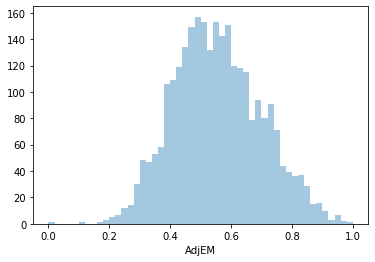

In [6]:
sns.distplot(full_data['AdjEM'],50, hist = True, kde = False)

In [7]:
historic_game_data.head()

,Away_Team,Away_Score,Home_Team,Home_Score,year,day,tourney_game
0,Michigan,62,Villanova,79,2018,2018-04-02,0
1,Loyola (IL),57,Michigan,69,2018,2018-03-31,1
2,Villanova,95,Kansas,79,2018,2018-03-31,1
3,San Francisco,77,North Texas,88,2018,2018-03-30,1
4,UIC,71,Northern Colorado,76,2018,2018-03-30,1


In [8]:
full_data_model = full_data.copy()
full_data_model['lookup'] = full_data_model['Year'].map(str) + "_" + full_data_model['team_fix']
full_data_model.drop(['team_fix'], axis=1, inplace=True)
full_data_model.head()

,AdjEM,AdjO,AdjD,AdjT,Luck,AdjEM_SOS,OppO,OppD,AdjEM_NCSOS,Year,lookup
0,0.958559,0.924528,0.174877,0.291188,0.574124,0.812081,0.802030,0.228188,0.392174,2011,2011_Ohio State
1,0.917600,0.794340,0.091133,0.409962,0.355795,0.855034,0.802030,0.147651,0.413310,2012,2012_Ohio State
2,0.861583,0.737736,0.130542,0.283525,0.544474,0.857718,0.720812,0.033557,0.350757,2013,2013_Ohio State
3,0.811950,0.628302,0.088670,0.298851,0.374663,0.777852,0.817259,0.322148,0.412739,2014,2014_Ohio State
4,0.805325,0.747170,0.256158,0.344828,0.374663,0.742953,0.761421,0.322148,0.297058,2015,2015_Ohio State


In [9]:
np.random.seed(1995)
df_rand = np.random.random_sample((len(historic_game_data.index), ))
historic_game_data['rand'] = df_rand
## Create new columns with random home/away splits 
historic_game_data['team_one'] = np.where(historic_game_data['rand'] >= .5,
                                          historic_game_data['year'].map(str) + "_" + historic_game_data['Home_Team'],
                                          historic_game_data['year'].map(str) + "_" + historic_game_data['Away_Team'])
historic_game_data['team_two'] = np.where(historic_game_data['rand'] >= .5,
                                          historic_game_data['year'].map(str) + "_" + historic_game_data['Away_Team'],
                                          historic_game_data['year'].map(str) + "_" + historic_game_data['Home_Team'])## Create home/neutral/away variable
## Create home/neutral/away variable
## May be better as two binary flags
## Only reliable for March Madness - imperfect home/away data available
historic_game_data['loc'] = np.where(historic_game_data['tourney_game'] == 1.0, 0.0,
                                np.where(historic_game_data['team_one'] == historic_game_data['year'].map(str) + "_" + historic_game_data['Home_Team'], 1.0, -1.0
                                        )
                                    )
historic_game_data.drop(['day'], axis = 1, inplace = True)
full_data_model_two = full_data_model.copy()
full_data_model_two.columns = ['AdjEM_opp', 'AdjO_opp', 'AdjD_opp', 'AdjT_opp', 'Luck_opp', 'AdjEM_SOS_opp', 'OppO_opp', 'OppD_opp', 'AdjEM_NCSOS_opp', 'Year_opp', 'lookup_opp']

historic_game_data = pd.merge(historic_game_data, full_data_model, left_on = 'team_one', right_on = 'lookup')
historic_game_data = pd.merge(historic_game_data, full_data_model_two, left_on = 'team_two', right_on = 'lookup_opp')

final_model_data = historic_game_data.copy()
final_model_data['total'] = final_model_data['Home_Score'] + final_model_data['Away_Score']
final_model_data['difference'] = np.where(historic_game_data['year'].map(str) + "_" + historic_game_data['Home_Team'] == historic_game_data['team_one'],
                                          final_model_data['Home_Score'] - final_model_data['Away_Score'],
                                          final_model_data['Away_Score'] - final_model_data['Home_Score'])

final_model_all = final_model_data.copy()
final_model_all.drop(['year', 'Home_Team', 'rand', 'Away_Team', 'Home_Score', 'Away_Score', 'team_one', 'team_two', 'tourney_game', 'lookup', 'lookup_opp'], axis=1, inplace=True)

## Convert Year variables to floats
final_model_all['Year'] = final_model_all['Year'] / 1.0
final_model_all['Year_opp'] = final_model_all['Year_opp'] / 1.0

## Take a quick look at final model file to get more comfortable with the output

final_model_all.head()

,loc,AdjEM,AdjO,AdjD,AdjT,Luck,AdjEM_SOS,OppO,OppD,AdjEM_NCSOS,...,AdjD_opp,AdjT_opp,Luck_opp,AdjEM_SOS_opp,OppO_opp,OppD_opp,AdjEM_NCSOS_opp,Year_opp,total,difference
0,-1.0,0.846886,0.730189,0.150246,0.333333,0.630728,0.862416,0.928934,0.302013,0.370751,...,0.236453,0.478927,0.442049,0.895638,0.923858,0.228188,0.622394,2018.0,141,-17
1,1.0,0.832791,0.794340,0.263547,0.505747,0.514825,0.568792,0.675127,0.550336,0.597829,...,0.236453,0.478927,0.442049,0.895638,0.923858,0.228188,0.622394,2018.0,160,-16
2,0.0,0.716902,0.616981,0.266010,0.478927,0.536388,0.890940,0.903553,0.208054,0.581262,...,0.236453,0.478927,0.442049,0.895638,0.923858,0.228188,0.622394,2018.0,139,-23
3,1.0,0.772678,0.771698,0.354680,0.509579,0.415094,0.855705,0.883249,0.255034,0.508712,...,0.236453,0.478927,0.442049,0.895638,0.923858,0.228188,0.622394,2018.0,137,-1
4,-1.0,0.784845,0.758491,0.315271,0.436782,0.363881,0.892282,0.959391,0.281879,0.511854,...,0.236453,0.478927,0.442049,0.895638,0.923858,0.228188,0.622394,2018.0,161,-11
